# **Proyecto Final - Data Science 2**
## **Prediccion de Pais Destino en AirBnB**

En esta entrega se cubren las siguentes rubricas:

1. Generar preguntas o hipótesis de interés sobre el dataset elegido para el proyecto final.
2. Crear gráficos que usen al menos tres variables y hacer un diagnóstico de lo que los mismos nos están diciendo.
3. Vincular los gráficos y análisis numéricos hechos hasta el momento con las preguntas de interés.
4. Identificar valores perdidos.

El dataset esta compuesto de una carpeta de archivos en formato CSV conteniendo informacion de usuarios de USA que realizan reservaciones en AirBnB para diferentes paises. Dicho Dataset puede descargarse de kaggle (solo despues de un muy engorroso proceso de alta de usuario) en la siguiente liga:

__https://www.kaggle.com/competitions/airbnb-recruiting-new-user-bookings/data__

El sitio web describe el Dataset con el siguiente parrafo:

''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''
Dataset Description'''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''

In this challenge, you are given a list of users along with their demographics, web session records, and some summary statistics. You are asked to predict which country a new user's first booking destination will be. All the users in this dataset are from the USA.

There are 12 possible outcomes of the destination country: 'US', 'FR', 'CA', 'GB', 'ES', 'IT', 'PT', 'NL','DE', 'AU', 'NDF' (no destination found), and 'other'. Please note that 'NDF' is different from 'other' because 'other' means there was a booking, but is to a country not included in the list, while 'NDF' means there wasn't a booking.

The training and test sets are split by dates. In the test set, you will predict all the new users with first activities after 7/1/2014 (note: this is updated on 12/5/15 when the competition restarted). In the sessions dataset, the data only dates back to 1/1/2014, while the users dataset dates back to 2010. ''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''

## Pt. I Analisis de Metadatos

El dataset consta de 5 archivos en formato CSV que contienen unformacion de los usuarios y reservaciones en la plataforma AirBnb. Los archivos son los siguientes:

1. **age_gender_bkts**: contiene info. de la edad, pais, genero, ID y anyo de registro de los usuarios
2. **countries**: describe los paises destino de los diferentes usuarios, describe la ubicacion con latitud y longitud, distancia en km, descripcion del destino en km2, lenguaje del pais destino y distancia levenshtein del lenguaje
3. **sessions**: contiene informacion de sesion del usuario, userID, accion ejecutada, tipo de accion, detalle de accion, tipo de dispositivo y segundos transcurridos
4. **test_users**: dataset de 15 columnas con informacion de los regtistros como user ID, fecha de creacion del usuario, timestamp de actividad, fecha de la primera reserva, genero, edad, metodo de registro, flujo de registro, idioma, canal afiliado, proveedor afiliado, primer afiliado reconocido, tipo de aplicacion de registro y primer browser. Se usa para probar el modelo predictivo.
5. **train_users_2**: dataset de 16 columnas con informacion de los regtistros como user ID, fecha de creacion del usuario, timestamp de actividad, fecha de la primera reserva, genero, edad, metodo de registro, flujo de registro, idioma, canal afiliado, proveedor afiliado, primer afiliado reconocido, tipo de aplicacion de registro, primer browser y pais de destino. 

El objetivo de todo el dataset es que el programador se dedique a disenyar y entrenar un modelo predictivo para lograr saber cual es el siguiente pais que visitara un usuario registrado.

Los dos archivos de Excel relevantes para el estudio (a mi consideracion) son:

1. **train_set**
2. **test_set**


### Librerias Necesarias
Este proyecto empieza importando las librerias necesarias. Necesito bastantes librerias para llenar, organizar, procesar, y revisar estructuras de datos o Dataframes.

Procesamiento de Dataframes:

    1. Pandas
    2. NumPy
    3. datetime  

Generacion de Graficas:

    4. Matplotlib

Modelado de Machine Learning:

    5. sklearn LabelEncoder
    6. sklearn train_test_slpit
    7. sklearn RandomForestClassifier
    8. sklearn cross_val_score
    9. sklearn classification_report
    10. sklearn confusion_matrix,mean_absolute_error, mean_squared_error, r2_score, accuracy_score

In [1]:
## Empiezo a importar las librerias necesarias para el proyecto
import matplotlib.pyplot as plt # Para graficar
import pandas as pd  # Para manipulacion de datos
import numpy as np   # Para operaciones numericas
import seaborn as sns
import lazypredict

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from imblearn.under_sampling import RandomUnderSampler



In [2]:
# Cargando Datasets...
train_df = pd.read_csv("train_users_2.csv")
test_df = pd.read_csv("test_users.csv")

# Mostrar informacion basica. Si deseo Mergearlos, necesito que sus vectores tengan la misma forma (1x16 , 1x15)
print("Train Shape:", train_df.shape)
print("Test Shape:", test_df.shape)


Train Shape: (213451, 16)
Test Shape: (62096, 15)


In [3]:
#Muestro el nombre de todas las columnas disponibles en los dataframes, 
print("Train columns:\n", train_df.columns)
print("\nTest columns:\n", test_df.columns)

Train columns:
 Index(['id', 'date_account_created', 'timestamp_first_active',
       'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow',
       'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser', 'country_destination'],
      dtype='object')

Test columns:
 Index(['id', 'date_account_created', 'timestamp_first_active',
       'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow',
       'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser'],
      dtype='object')


In [4]:
print("\nTrain Data Types:\n", train_df.dtypes)
print("\nTest Data Types:\n", test_df.dtypes)


Train Data Types:
 id                          object
date_account_created        object
timestamp_first_active       int64
date_first_booking          object
gender                      object
age                        float64
signup_method               object
signup_flow                  int64
language                    object
affiliate_channel           object
affiliate_provider          object
first_affiliate_tracked     object
signup_app                  object
first_device_type           object
first_browser               object
country_destination         object
dtype: object

Test Data Types:
 id                          object
date_account_created        object
timestamp_first_active       int64
date_first_booking         float64
gender                      object
age                        float64
signup_method               object
signup_flow                  int64
language                    object
affiliate_channel           object
affiliate_provider          object
fi

### Descripcion de 'train_set'
Es un vector Train Shape: (213451, 16)
Tengo 16 columnas:

    1. id                        9. language
    2. date_account_created      10. affiliate_channel  
    3. timestamp_first_active    11. affiliate_provider
    4. date_first_booking        12. first_affiliate_tracked
    5. gender                    13. signup_app
    6. age                       14. first_device_type
    7. signup_method             15. first_browser
    8. signup_flow               16. country_destination

Existen datos raros a simple vista?

 ![train_users head.png](<attachment:train_users head.png>)

### Descripcion de 'test_set'
Cuantas filas x columnas? Test Shape: (62096, 15)
Tengo 16 columnas:

    1. id                        9. language
    2. date_account_created      10. affiliate_channel  
    3. timestamp_first_active    11. affiliate_provider
    4. date_first_booking        12. first_affiliate_tracked
    5. gender                    13. signup_app
    6. age                       14. first_device_type
    7. signup_method             15. first_browser
    8. signup_flow               
Existen datos raros a simple vista?

![test_users head.png](<attachment:test_users head.png>)

Desde el vamos, el test_set carece de la columna Target, que seria 'country_destination'. Es decir: 

**No puedo hacer merge a estos datasets para obtener mas info para el entrenamiento de mi modelo.**
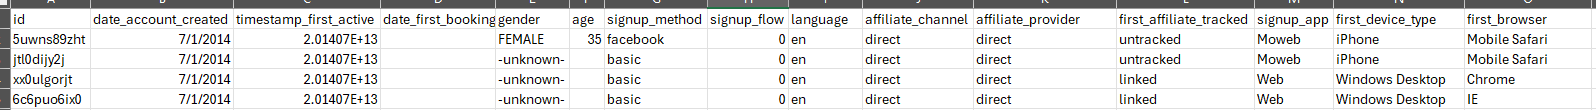
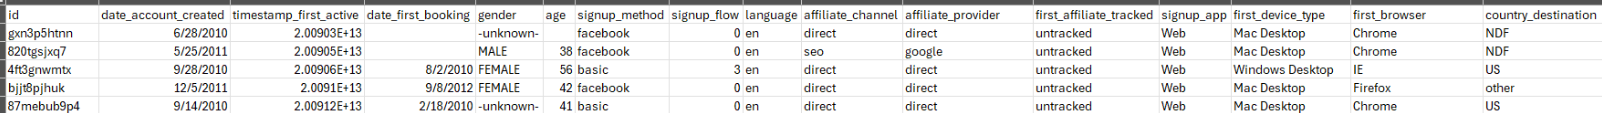

### Identificacion de Ruido en el Dataset

Empiezo buscando datos faltantes, nulos, corruptos, etc en ambos datasets:

In [5]:
print("\nMissing Values in Train Set:\n", train_df.isnull().sum())
print("\nMissing Values in Test Set:\n", test_df.isnull().sum())



Missing Values in Train Set:
 id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                          0
age                         87990
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
dtype: int64

Missing Values in Test Set:
 id                             0
date_account_created           0
timestamp_first_active         0
date_first_booking         62096
gender                         0
age                        28876
signup_method                  0
signup_flow                    0
language                       0
affiliate_channel              0
affiliate_provider             0
first_affiliate_tra

In [6]:
a=213451 #Numero de filas en el dataset de entrenamiento
b= 100
c=train_df['date_first_booking'].isnull().sum()
x = (b*c)/a 
print("Perdida de  un ", x ," % de los datos")
print(c)

Perdida de  un  58.347349040294965  % de los datos
124543


In [7]:
d= 213451 #Numero de filas en el dataset de entrenamiento
e= 100
f= (train_df['country_destination']== 'NDF').sum()
y = (f*e)/d 
print("Perdida de  un ", y ," % de los datos")
print(f)

Perdida de  un  58.347349040294965  % de los datos
124543


Estoy notando que en el archivo 'train_users_2' muchos usuarios NO tienen fecha de primera reserva. 

Como dato curioso, el dataset de entrenamiento tiene un total de 213451 filas, de las cuales:

    1. No existe ninguna fila en 'country_destination' que tenga valor Nulo y/o NaN
    2. Existen 124543 filas en 'first_date_booking' con valores Nulos y/o NaN
    3. Existen 124543 filas en 'country_destination' con valores 'NDF' o sin pais definido.

Si echo un vistazo en Excel y ordeno el dataset de menor a mayor fecha, todos los NDF coinciden con los registros que corresponden a 'first_date_booking' vacios

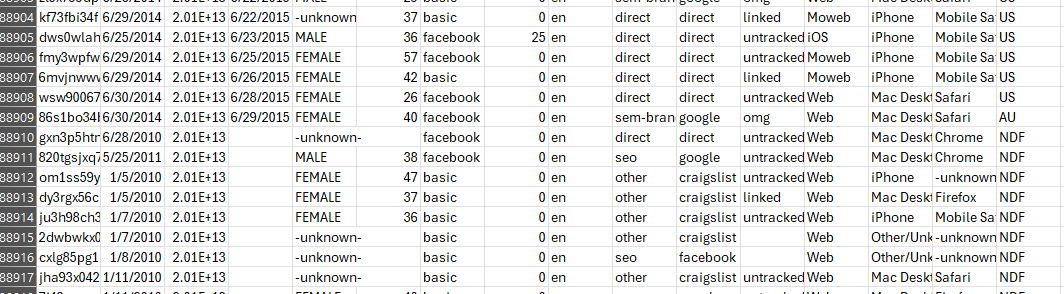

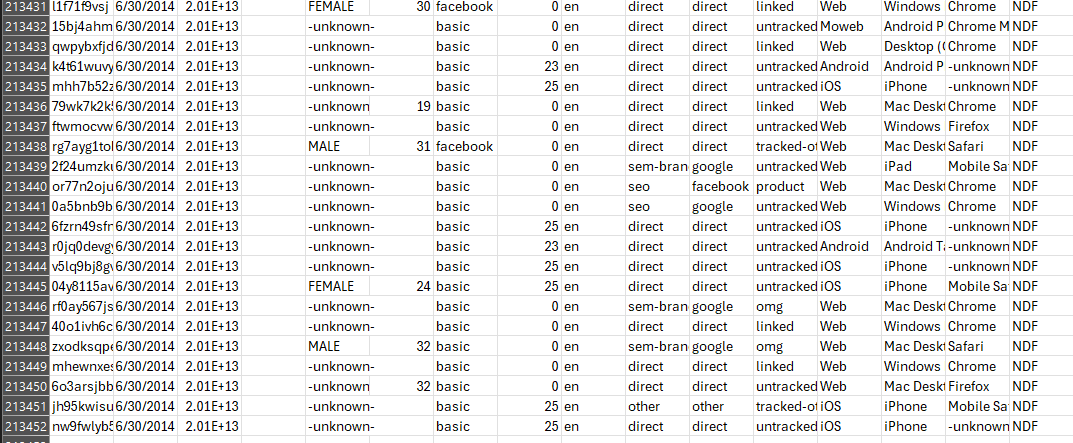

Como el objetivo de mis predicciones es conocer el destino de un usuario que viaja, podria droppear las filas de usuarios que NO tienen una reserva y observar si los resultados son buenos al momento de observar la distribucion. ---> Si este fuera el caso, **perderia 58.3473% de los datos**

En ese caso, decido dejar estos datos y compensarlo posteriormente con algun metodo ya sea undersampling, oversampling, class weights o afines.

Tambien observo que la columna 'age' tiene datos faltantes, sin embargo estos los voy a conservar, pues los puedo llenar con una mediana para no perder datos.



In [8]:
categorical_columns = train_df.select_dtypes(include=['object']).columns.tolist()
categorical_summary = {col: train_df[col].nunique() for col in categorical_columns}

print("\nUnique Values in Categorical Features:\n", categorical_summary)


Unique Values in Categorical Features:
 {'id': 213451, 'date_account_created': 1634, 'date_first_booking': 1976, 'gender': 4, 'signup_method': 3, 'language': 25, 'affiliate_channel': 8, 'affiliate_provider': 18, 'first_affiliate_tracked': 7, 'signup_app': 4, 'first_device_type': 9, 'first_browser': 52, 'country_destination': 12}


In [9]:
print("\nAge Summary:\n", train_df['age'].describe())



Age Summary:
 count    125461.000000
mean         49.668335
std         155.666612
min           1.000000
25%          28.000000
50%          34.000000
75%          43.000000
max        2014.000000
Name: age, dtype: float64


In [10]:
train_df['timestamp_first_active'] = pd.to_datetime(train_df['timestamp_first_active'], format='%Y%m%d%H%M%S')
test_df['timestamp_first_active'] = pd.to_datetime(test_df['timestamp_first_active'], format='%Y%m%d%H%M%S')

print("\nConverted Timestamp Example:\n", train_df[['timestamp_first_active']].head())



Converted Timestamp Example:
   timestamp_first_active
0    2009-03-19 04:32:55
1    2009-05-23 17:48:09
2    2009-06-09 23:12:47
3    2009-10-31 06:01:29
4    2009-12-08 06:11:05


In [11]:
# Summary of categorical features
categorical_columns = train_df.select_dtypes(include=['object']).columns.tolist()
categorical_summary = {col: train_df[col].nunique() for col in categorical_columns}

# Unique values in target variable
target_distribution = train_df['country_destination'].value_counts(normalize=True) * 100

# Checking age distribution and potential outliers
age_summary = train_df['age'].describe()

# Convert timestamp_first_active to datetime format
train_df['timestamp_first_active'] = pd.to_datetime(train_df['timestamp_first_active'], format='%Y%m%d%H%M%S')
test_df['timestamp_first_active'] = pd.to_datetime(test_df['timestamp_first_active'], format='%Y%m%d%H%M%S')

# Display results
categorical_summary, target_distribution, age_summary


({'id': 213451,
  'date_account_created': 1634,
  'date_first_booking': 1976,
  'gender': 4,
  'signup_method': 3,
  'language': 25,
  'affiliate_channel': 8,
  'affiliate_provider': 18,
  'first_affiliate_tracked': 7,
  'signup_app': 4,
  'first_device_type': 9,
  'first_browser': 52,
  'country_destination': 12},
 country_destination
 NDF      58.347349
 US       29.222632
 other     4.728954
 FR        2.353233
 IT        1.328174
 GB        1.088774
 ES        1.053638
 CA        0.669006
 DE        0.497070
 NL        0.356991
 AU        0.252517
 PT        0.101663
 Name: proportion, dtype: float64,
 count    125461.000000
 mean         49.668335
 std         155.666612
 min           1.000000
 25%          28.000000
 50%          34.000000
 75%          43.000000
 max        2014.000000
 Name: age, dtype: float64)

Empezamos con el Analisis de Metadatos de mi dataset

Initial Findings:

    Dataset Sizes
        Train set: 213,451 rows × 16 columns
        Test set: 62,096 rows × 15 columns (missing country_destination, which is expected)

    Column Overview
        The datasets share the same structure except for country_destination in the train set.
        Most columns are categorical, with age as a numerical feature.
        timestamp_first_active is stored as an integer (likely a timestamp).

    Missing Values
        date_first_booking has 124,543 missing values (58%) in the train set and completely missing (100%) in the test set.
        age has 87,990 missing values (41%) in the train set and 28,876 missing (46%) in the test set.
        first_affiliate_tracked has some missing values (6,065 in train, 20 in test).

Next Steps:

    Check value distributions and unique categories.
    Investigate age (e.g., invalid values or outliers).
    Convert timestamp_first_active to a readable date.
    Examine the target variable country_destination.

I'll continue the analysis now. ​

​
Key Insights:

    Categorical Feature Overview
        gender: 4 unique values
        signup_method: 3 unique values
        language: 25 unique values
        first_browser: 52 unique values (could be simplified)
        country_destination: 12 unique values (our target variable)

    Target Variable Distribution
        58.3% of users did not book any destination (NDF)
        29.2% booked in the US
        Other countries have much lower representation (e.g., France: 2.35%, Italy: 1.33%)
        The dataset is highly imbalanced, which may require handling techniques (e.g., resampling or weighted loss functions).

    Age Distribution and Outliers
        Mean age: 49.67, but the max value is 2014, which is clearly incorrect.
        75% of users are 43 or younger, suggesting values above ~100 might be invalid.
        Likely need to filter or impute extreme age values.

    Timestamp Conversion
        timestamp_first_active is now a readable datetime format, which will allow extracting useful features (e.g., year, month, weekday).

## Pt. 2 EDA

Se realiza el tratamiento de los datos con el fin de mejorar la prediccion. 

### Visualizacion de Columna 'age'

Comienzo graficando los valores de la columna 'age' para conocer la distribucion de los datos:

count    125461.000000
mean         49.668335
std         155.666612
min           1.000000
25%          28.000000
50%          34.000000
75%          43.000000
max        2014.000000
Name: age, dtype: float64


<Axes: xlabel='age'>

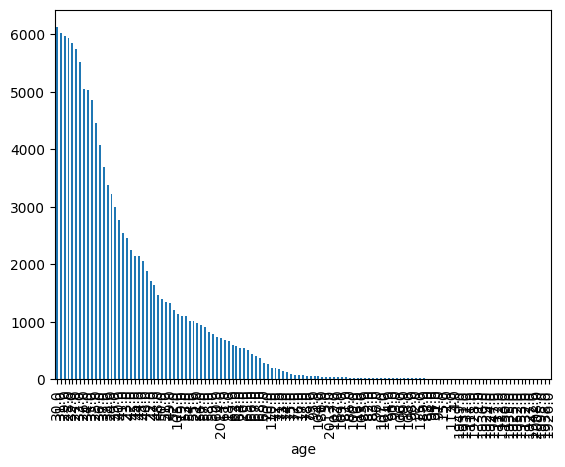

In [12]:
age = train_df['age']
print(train_df['age'].describe())

age.value_counts().plot.bar()

He decidido quitar los valores ilogicos de la columa age (por ejemplo, una persona de 2024 a;os de edad). Considero que para este analisis vale la pena pensar que las personas registradas deben tener al menos 18 a;os por motivos de politicas de la plataforma, y maximo 100 a;os como limite superior.

Hago asi para los conjuntos de test y train:

(array([ 7457., 24400., 34514., 19019., 13889.,  7708.,  6616.,  3932.,
         3068.,  1277.,   556.,   177.,   129.,    74.,   142.]),
 array([ 18.        ,  23.46666667,  28.93333333,  34.4       ,
         39.86666667,  45.33333333,  50.8       ,  56.26666667,
         61.73333333,  67.2       ,  72.66666667,  78.13333333,
         83.6       ,  89.06666667,  94.53333333, 100.        ]),
 <BarContainer object of 15 artists>)

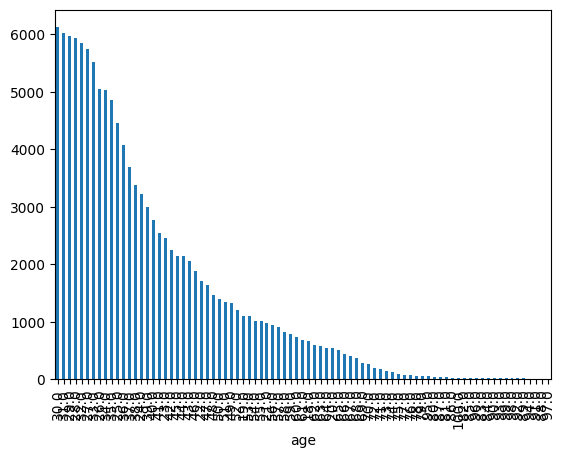

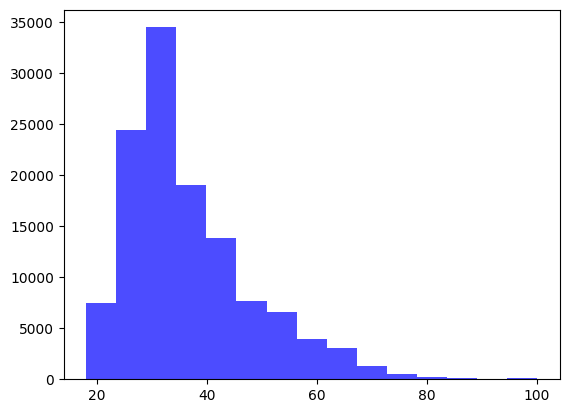

In [13]:
# Convert timestamp_first_active to datetime format
train_df['timestamp_first_active'] = pd.to_datetime(train_df['timestamp_first_active'], format='%Y%m%d%H%M%S')

# Clean 'age' column: Keep values between 18 and 100, set others to NaN
valid_age_range_test = (train_df['age'] >= 18) & (train_df['age'] <= 100)
train_df.loc[~valid_age_range_test, 'age'] = np.nan

age.value_counts().plot.bar()
fig, ax = plt.subplots()
ax.hist(age.dropna(), bins=15, color='blue', alpha=0.7)

<Axes: xlabel='age'>

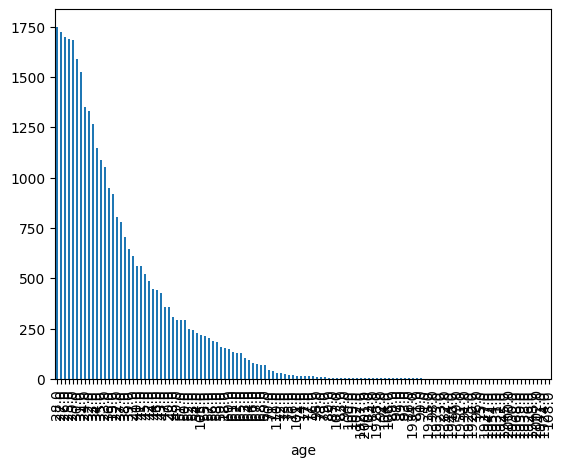

In [14]:
aget = test_df['age']
aget.value_counts().plot.bar()

(array([3905., 8214., 8543., 4169., 3006., 1698., 1417.,  829.,  620.,
         254.,  103.,   25.,   19.,   17.,   26.]),
 array([ 18.        ,  23.46666667,  28.93333333,  34.4       ,
         39.86666667,  45.33333333,  50.8       ,  56.26666667,
         61.73333333,  67.2       ,  72.66666667,  78.13333333,
         83.6       ,  89.06666667,  94.53333333, 100.        ]),
 <BarContainer object of 15 artists>)

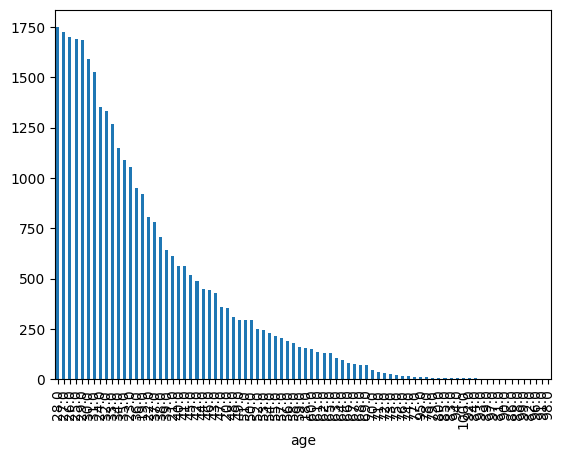

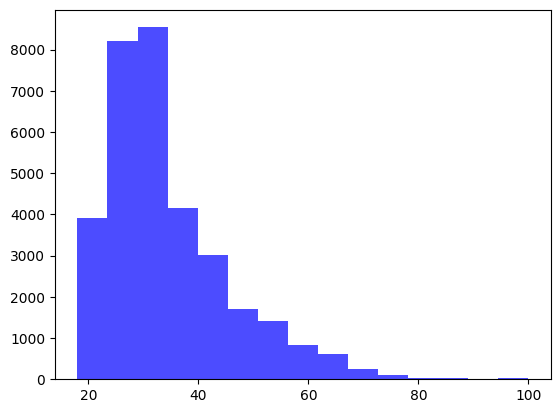

In [15]:
# Convert timestamp_first_active to datetime format
test_df['timestamp_first_active'] = pd.to_datetime(test_df['timestamp_first_active'], format='%Y%m%d%H%M%S')

# Clean 'age' column: Keep values between 18 and 100, set others to NaN
valid_age_range_test = (test_df['age'] >= 18) & (test_df['age'] <= 100)
test_df.loc[~valid_age_range_test, 'age'] = np.nan

aget.value_counts().plot.bar()
fig, ax = plt.subplots()
ax.hist(aget, bins=15, color='blue', alpha=0.7)

### Visualizacion de Columna 'gender'

Grafico la columna de Genero del dataset, pues considero que esta variable puede ayudar a realizar predicciones.

(array([95688.,     0.,     0.,     0.,     0., 54440.,     0.,     0.,
            0.,     0., 63041.,     0.,     0.,     0.,   282.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4,
        2.6, 2.8, 3. ]),
 <BarContainer object of 15 artists>)

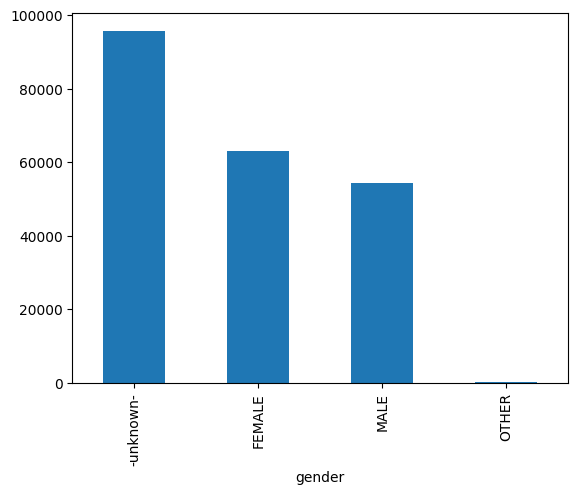

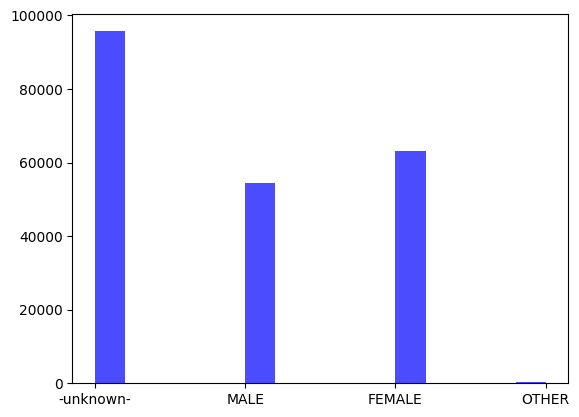

In [16]:
#Se grafican los valores unicos en la columna de genero, pues podria ser un buen indicador:
train_df['gender'].value_counts().plot.bar()
gender = train_df['gender']
fig, ax = plt.subplots()
ax.hist(gender, bins=15, color='blue', alpha=0.7)

(array([54440.,     0.,     0.,     0.,     0.,     0.,     0., 63041.,
            0.,     0.,     0.,     0.,     0.,     0.,   282.]),
 array([0.        , 0.13333333, 0.26666667, 0.4       , 0.53333333,
        0.66666667, 0.8       , 0.93333333, 1.06666667, 1.2       ,
        1.33333333, 1.46666667, 1.6       , 1.73333333, 1.86666667,
        2.        ]),
 <BarContainer object of 15 artists>)

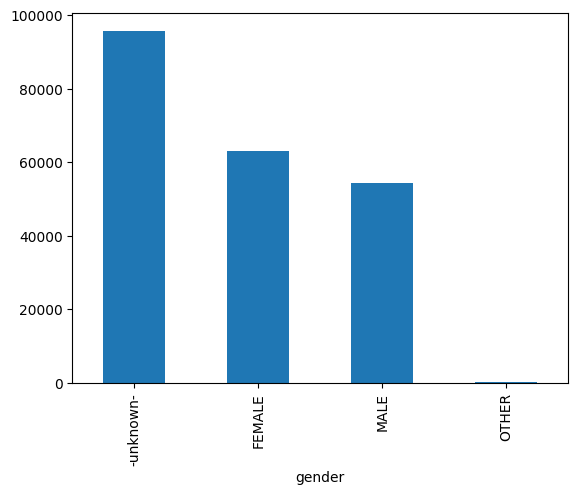

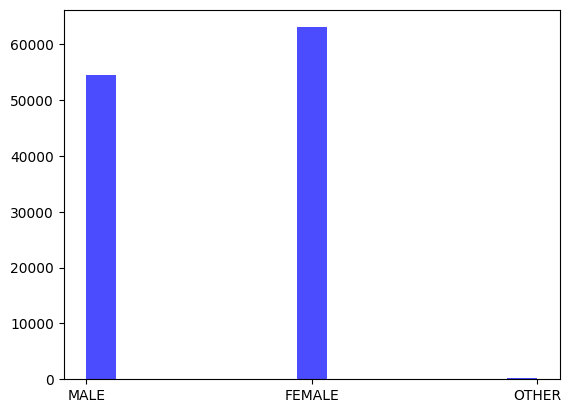

In [17]:
genderc = train_df['gender'].replace("-unknown-", np.nan)
gender.value_counts().plot.bar()
fig, ax = plt.subplots()
ax.hist(genderc.dropna(), bins=15, color='blue', alpha=0.7)

### Visualizacion de Columna 'signup_flow'

Esta columna podria ser util para el modelo predictivo, decido graficarla para observar la distribucion.

(array([1.65786e+05, 1.57030e+04, 1.00000e+00, 3.37000e+02, 2.40000e+02,
        0.00000e+00, 2.00000e+00, 9.32900e+03, 0.00000e+00, 2.10000e+01,
        0.00000e+00, 0.00000e+00, 2.10000e+02, 2.83500e+03, 1.89870e+04]),
 array([ 0.        ,  1.66666667,  3.33333333,  5.        ,  6.66666667,
         8.33333333, 10.        , 11.66666667, 13.33333333, 15.        ,
        16.66666667, 18.33333333, 20.        , 21.66666667, 23.33333333,
        25.        ]),
 <BarContainer object of 15 artists>)

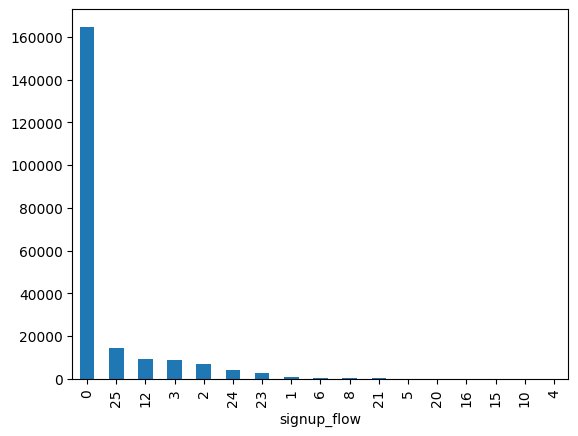

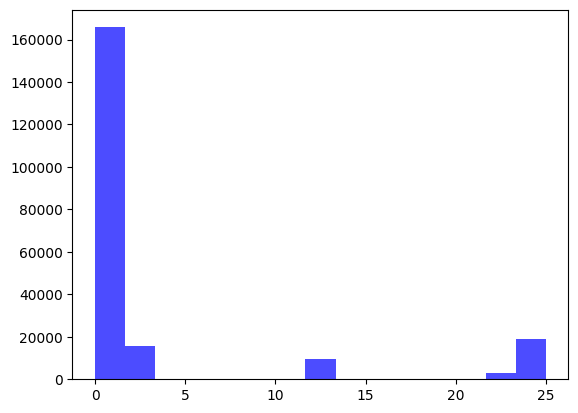

In [18]:
sign = train_df['signup_flow']
sign.value_counts().plot.bar()
fig, ax = plt.subplots()
ax.hist(sign, bins=15, color='blue', alpha=0.7)

### Columna 'language'

Podria ser que el lenguaje del usuario de indicios sobre los paises que quiera visitar, posiblemente por razones culturales del lugar de origen. Pongamoslo a prueba.

Esta variable es multiple categorica, por lo que un histograma con su distribucion no seria util para saber que tan bien va a predecir.

<Axes: xlabel='language'>

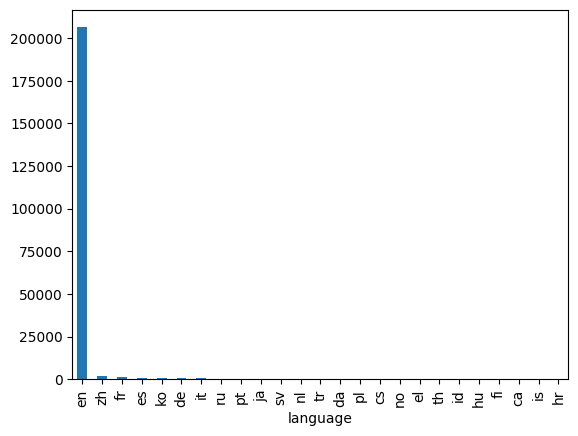

In [19]:
lang = train_df['language']
lang.value_counts().plot.bar()

Sin embargo, la inmensa mayoria de los usuarios es angloparlante, por lo cual no creo encontrar mucha informacion con estos datos.

### Columna 'country_destination'

Es mi columna objetivo para las predicciones, por lo cual debera ser manejada con mucho cuidado. Empezare por observar su histograma para determinar la distribucion de estos datos:

    Check for missing values (though there shouldn't be any in the training set).
    Look for inconsistencies (e.g., unexpected values).
    Analyze class distribution again (since it's highly imbalanced).
    Decide on encoding:
        We’ll likely use label encoding (mapping each country to a number) for modeling.
        Alternatively, one-hot encoding could be used if the model requires categorical features.

<Axes: xlabel='country_destination'>

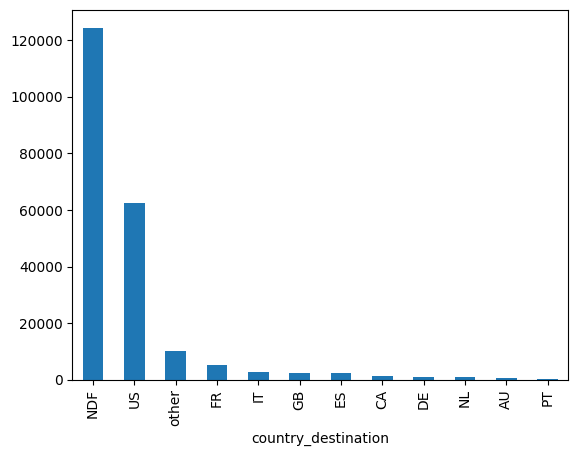

In [20]:
destination = train_df['country_destination']
destination.value_counts().plot.bar()

La mayoria de los datos son a un pais NDF. Como he explorado antes, no puedo recortar los datos NDF, pues corresponden al 58.3~% de los datos del dataset. La mayoria de los usuarios cayendo en las categorias NDF y US. Esto tendra que ser compensado mas adelante en el proyecto con alguna medida. 

Missing values in 'country_destination': 0

Unique values in 'country_destination': ['NDF' 'US' 'other' 'FR' 'CA' 'GB' 'ES' 'IT' 'PT' 'NL' 'DE' 'AU']

Target variable distribution (%):
 country_destination
NDF      58.347349
US       29.222632
other     4.728954
FR        2.353233
IT        1.328174
GB        1.088774
ES        1.053638
CA        0.669006
DE        0.497070
NL        0.356991
AU        0.252517
PT        0.101663
Name: proportion, dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

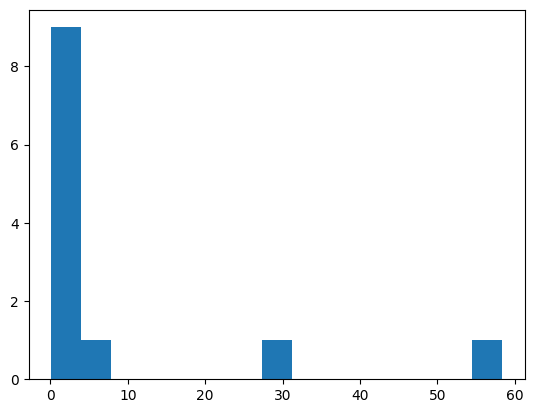

In [21]:
# Check for missing values
print("Missing values in 'country_destination':", train_df['country_destination'].isnull().sum())

# Check unique values
print("\nUnique values in 'country_destination':", train_df['country_destination'].unique())

# Check target variable distribution
target_distribution = train_df['country_destination'].value_counts(normalize=True) * 100
print("\nTarget variable distribution (%):\n", target_distribution)

#target_distribution.plot()
plt.hist(target_distribution,15) ## Antes de graficar tengo que hacer hot encoding
plt.show

Estoy intentando observar la distribucion de una variable Categorica, lo cual no llegara muy lejos pues la distribucion aplica para valores numericos y continuos, no para categoricos.

## Pt. 3  Data Wrangling

En este apartado voy a procurar obtener datos con una distribucion mas cercana a lo que se considera Normal y dejarlos lo mas limpios posible para proponer un modelo predictivo.

### Columna 'age'

Procedo a tratar los datos del dataset de Entrenamiento imputando la mediana de edad en los valores vacios.

count    213451.000000
mean         35.483680
std           8.956788
min          18.000000
25%          32.000000
50%          34.000000
75%          35.000000
max         100.000000
Name: agef, dtype: float64


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6872\3548923055.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['agef'].fillna(median_age, inplace=True)


(array([7.45700e+03, 2.44000e+04, 1.25007e+05, 1.90190e+04, 1.38890e+04,
        7.70800e+03, 6.61600e+03, 3.93200e+03, 3.06800e+03, 1.27700e+03,
        5.56000e+02, 1.77000e+02, 1.29000e+02, 7.40000e+01, 1.42000e+02]),
 array([ 18.        ,  23.46666667,  28.93333333,  34.4       ,
         39.86666667,  45.33333333,  50.8       ,  56.26666667,
         61.73333333,  67.2       ,  72.66666667,  78.13333333,
         83.6       ,  89.06666667,  94.53333333, 100.        ]),
 <BarContainer object of 15 artists>)

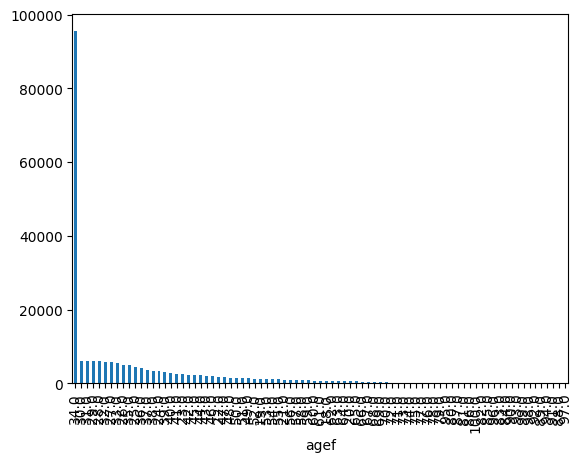

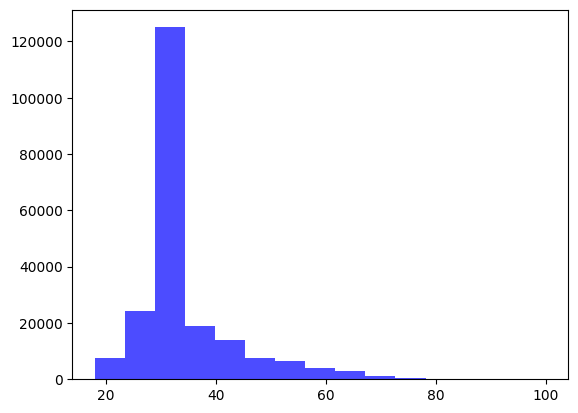

In [22]:
# Fill missing ages with the same median from the training set (34)
median_age = 34  # Use the calculated median from train data
train_df['agef'] = train_df['age']

#Aqui sobreescribo la columna con datos imputados sobre la original
train_df['agef'].fillna(median_age, inplace=True)

# Verify the cleaned age distribution
print(train_df['agef'].describe())
valid_age_range_test = (train_df['agef'] >= 18) & (train_df['agef'] <= 100)
train_df.loc[~valid_age_range_test, 'agef'] = np.nan
train_df['agef'].value_counts().plot.bar()

fig, ax = plt.subplots()
ax.hist(train_df['agef'].dropna(), bins=15, color='blue', alpha=0.7)


In [23]:
train_df.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,agef
0,gxn3p5htnn,2010-06-28,2009-03-19 04:32:55,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF,34.0
1,820tgsjxq7,2011-05-25,2009-05-23 17:48:09,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF,38.0
2,4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US,56.0
3,bjjt8pjhuk,2011-12-05,2009-10-31 06:01:29,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other,42.0
4,87mebub9p4,2010-09-14,2009-12-08 06:11:05,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US,41.0


In [24]:
train_df['age'].head(20)

0      NaN
1     38.0
2     56.0
3     42.0
4     41.0
5      NaN
6     46.0
7     47.0
8     50.0
9     46.0
10    36.0
11    47.0
12     NaN
13    37.0
14    36.0
15    33.0
16     NaN
17    31.0
18     NaN
19    29.0
Name: age, dtype: float64

In [25]:
train_df['agef'].head(20)

0     34.0
1     38.0
2     56.0
3     42.0
4     41.0
5     34.0
6     46.0
7     47.0
8     50.0
9     46.0
10    36.0
11    47.0
12    34.0
13    37.0
14    36.0
15    33.0
16    34.0
17    31.0
18    34.0
19    29.0
Name: agef, dtype: float64

Despues de intentar reemplazar los valores NaN con la mediana de Edad, simplemente obtenemos un pico muy pronunciado con la distribucion aun cargada a la izquierda.

Intentare reiniciar mis valores y realizar un Sampleo Aleatorio (random sampling).

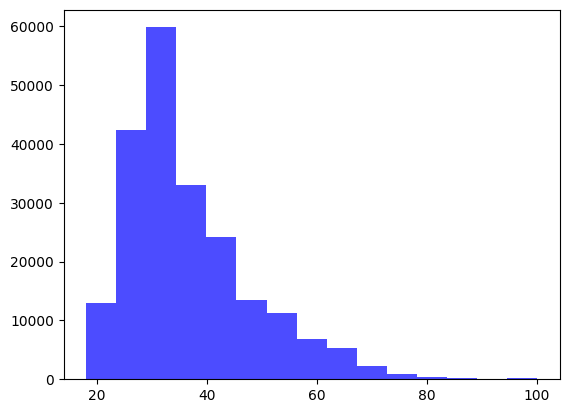

In [26]:
# Extract valid (non-null) ages
valid_ages = train_df['age'].dropna()

# Apply random sampling for missing values
train_df['age_r']=train_df['age'].apply(lambda x: np.random.choice(valid_ages) if np.isnan(x) else x)
train_df['age_r'].describe()

fig, ax = plt.subplots()
ax.hist(train_df['age_r'], bins=15, color='blue', alpha=0.7)

balanced_df=train_df

balanced_df['age']=train_df['age_r']

In [27]:
train_df['age_r'].head(30)

0     38.0
1     38.0
2     56.0
3     42.0
4     41.0
5     34.0
6     46.0
7     47.0
8     50.0
9     46.0
10    36.0
11    47.0
12    41.0
13    37.0
14    36.0
15    33.0
16    33.0
17    31.0
18    27.0
19    29.0
20    29.0
21    30.0
22    40.0
23    56.0
24    40.0
25    26.0
26    28.0
27    32.0
28    35.0
29    37.0
Name: age_r, dtype: float64

### Columna 'gender'

Considerando que respeto los valores 'male', 'female' y 'other' como variables categoricas, tengo que balancearlas de otra manera.



<Axes: xlabel='gender'>

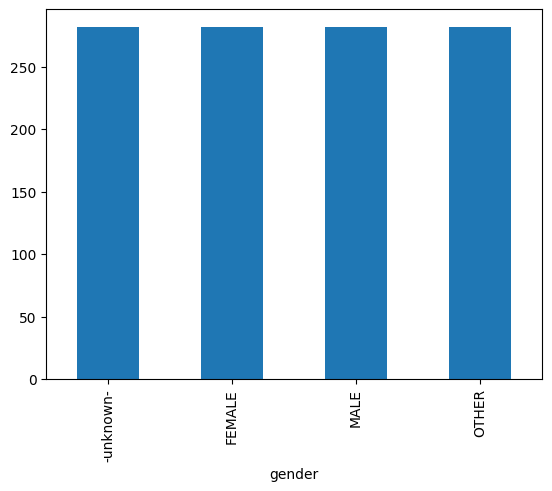

In [28]:
from imblearn.under_sampling import RandomUnderSampler

X = train_df.drop(columns=['gender'])
y = train_df['gender']

undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X, y)

balanced_df = X_resampled.copy()

## Guardo y sobreescribo la columna balanceada sobre la original

balanced_df['gender'] = y_resampled

y_resampled.head()
y_resampled.value_counts().plot.bar()

In [29]:
balanced_df['gender'].head(20)

188664    -unknown-
141178    -unknown-
64315     -unknown-
37925     -unknown-
4695      -unknown-
200357    -unknown-
87332     -unknown-
182314    -unknown-
52124     -unknown-
168434    -unknown-
103645    -unknown-
80280     -unknown-
179480    -unknown-
81952     -unknown-
59898     -unknown-
131347    -unknown-
43549     -unknown-
70142     -unknown-
157101    -unknown-
124947    -unknown-
Name: gender, dtype: object

### Columna 'language'

Decido emplear RandomUnderSampling para balancear el sesgo pesado que los datos tienen hacia el idioma Ingles o 'en', en la columna:

<Axes: xlabel='language'>

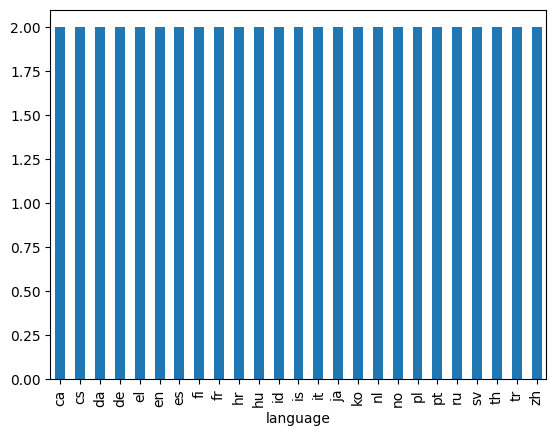

In [30]:
from imblearn.under_sampling import RandomUnderSampler

X = train_df.drop(columns=['language'])
y = train_df['language']

undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X, y)

balanced_df = X_resampled.copy()

## Guardo y sobreescribo la columna balanceada sobre la original

balanced_df['language'] = y_resampled

y_resampled.head()
y_resampled.value_counts().plot.bar()

In [31]:
balanced_df['language'].tail(20)

155624    ko
189549    ko
56739     nl
134501    nl
100378    no
201881    no
3691      pl
8096      pl
184999    pt
32553     pt
72524     ru
65402     ru
23499     sv
16822     sv
205333    th
189316    th
100421    tr
146056    tr
127598    zh
90701     zh
Name: language, dtype: object

### Columna 'Country Destination'

Empiezo a hacer el balanceo de la columna objetivo, empleando RandomUndersampling y dejar 

<Axes: xlabel='country_destination'>

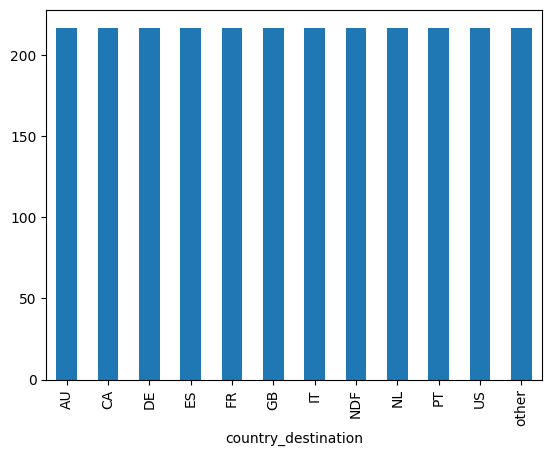

In [32]:
# Separate features and target variable
X = train_df.drop(columns=['country_destination'])
y = train_df['country_destination']

# Apply undersampling
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X, y)

# Recreate a balanced dataframe
balanced_df = pd.DataFrame(X_resampled, columns=X.columns)  # Reconstruct X as a DataFrame
balanced_df['country_destination'] = y_resampled  # Add the target column back

# Check the class distribution
y_resampled.value_counts().plot.bar()


In [33]:
balanced_df['country_destination'].tail(40)

43941     other
194149    other
60459     other
176715    other
47046     other
100491    other
213147    other
207378    other
25579     other
164104    other
151628    other
153140    other
84530     other
55833     other
107885    other
166197    other
118399    other
93095     other
171693    other
190867    other
166303    other
93275     other
196476    other
123079    other
101713    other
15092     other
96010     other
133210    other
155505    other
8114      other
197945    other
113887    other
181831    other
195123    other
208007    other
19098     other
4626      other
27939     other
145866    other
7431      other
Name: country_destination, dtype: object

#### Dataframe Balanceado

Al final de cada columna procesada he estado guardando los datos "limpios" en las columnas de un dataframe nuevo llamado "balanced_df", que es el que voy a usar para mi procesamiento del modelo predictivo.
Empiezo quitando las columnas que no voy a usar para el analisis:

In [34]:
balanced_df.drop(columns=['id','age_r' ], inplace=True)
balanced_df.head()

,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,agef,country_destination
186050,2014-05-08,2014-05-08 01:09:03,2014-05-08,MALE,25.0,basic,0,en,sem-non-brand,google,omg,Web,Mac Desktop,Safari,34.0,AU
28916,2012-06-23,2012-06-23 23:56:37,2012-06-24,FEMALE,48.0,basic,0,en,sem-non-brand,vast,omg,Web,Windows Desktop,IE,34.0,AU
126401,2013-11-21,2013-11-21 04:13:07,2013-12-07,MALE,24.0,facebook,0,en,direct,direct,linked,Web,Windows Desktop,Firefox,24.0,AU
35264,2012-08-06,2012-08-06 17:55:24,2012-08-10,MALE,27.0,basic,0,en,direct,direct,linked,Web,Mac Desktop,Chrome,27.0,AU
169066,2014-03-29,2014-03-29 03:16:23,2014-03-30,FEMALE,24.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari,24.0,AU


### Matriz de Correlaciones

Se crea una matriz de correlaciones para determinar cuales son las Features que podemos usar para predecir y cuales podemos dejar de un lado para optimizar el modelo:

In [35]:
# Convert target variable to numerical encoding
balanced_df['country_destination'] = balanced_df['country_destination'].astype('category').cat.codes

# Select numerical features
numerical_features = balanced_df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Compute correlation with target
correlation = balanced_df[numerical_features + ['country_destination']].corr()['country_destination'].sort_values(ascending=False)

# Display results
print(correlation)

country_destination    1.000000
signup_flow            0.039596
age                    0.031612
agef                   0.026199
Name: country_destination, dtype: float64


In [36]:
# Load dataset
# Convert target variable to numerical encoding
train_df['country_destination'] = train_df['country_destination'].astype('category').cat.codes

# Select numerical features
numerical_features = train_df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Compute correlation with target
correlation = train_df[numerical_features + ['country_destination']].corr()['country_destination'].sort_values(ascending=False)

# Display results
print(correlation)

country_destination    1.000000
agef                  -0.005533
age                   -0.021053
age_r                 -0.021053
signup_flow           -0.031561
Name: country_destination, dtype: float64


Comparado con el dataset original, podemos observar que la correlacion en las columnas del data set balanceado ha mejorado, aunque sea en poca medida.

## Pt. 4 - Diseño del Modelo Predictivo

En esta parte procedo a integrar modelos predictivos dise;ados para mi problema.

Tengo un problema: 
                    De aprendizaje supervisado: Conozco mi variable objetivo
                    Clasificatorio: Tengo que determinar en que categoria va a caer un usuario que viaja en AirBnB.
                    Multiclase: La variable objetivo se divide en 12 categorias distintas: AU, CA, DE, ES, FR, GB, IT, NL, PT, US, other, NDF.
                
En terminos de datos, existe la siguiente dificultad:

         El dataset 'test_users' NO posee una columna 'country_destination'.

Por lo cual tengo que apartar esos datos y particionar los datos en el conjunto de 'train_users_2' para poder entrenar un Modelo Predictivo y Validar dichas predicciones.


#### Particionando el Dataset 'train_users_2'

Decido hacer un particionado estratificado con un estado aleatorio predeterminado, para eso utilizare metodos en la libreria 'sklearn'

In [37]:
#Quiero hacer un modelo predictivo usando mis datos ya procesados, son los siguientes:

balanced_df.head()

,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,agef,country_destination
186050,2014-05-08,2014-05-08 01:09:03,2014-05-08,MALE,25.0,basic,0,en,sem-non-brand,google,omg,Web,Mac Desktop,Safari,34.0,0
28916,2012-06-23,2012-06-23 23:56:37,2012-06-24,FEMALE,48.0,basic,0,en,sem-non-brand,vast,omg,Web,Windows Desktop,IE,34.0,0
126401,2013-11-21,2013-11-21 04:13:07,2013-12-07,MALE,24.0,facebook,0,en,direct,direct,linked,Web,Windows Desktop,Firefox,24.0,0
35264,2012-08-06,2012-08-06 17:55:24,2012-08-10,MALE,27.0,basic,0,en,direct,direct,linked,Web,Mac Desktop,Chrome,27.0,0
169066,2014-03-29,2014-03-29 03:16:23,2014-03-30,FEMALE,24.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari,24.0,0


In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

# Separate features and target
X = balanced_df.drop(columns=['country_destination'])  # Replace 'target_column_name' with the actual name
y = balanced_df['country_destination']

# Split the train set into training and validation subsets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


print(X)

       date_account_created timestamp_first_active date_first_booking  \
186050           2014-05-08    2014-05-08 01:09:03         2014-05-08   
28916            2012-06-23    2012-06-23 23:56:37         2012-06-24   
126401           2013-11-21    2013-11-21 04:13:07         2013-12-07   
35264            2012-08-06    2012-08-06 17:55:24         2012-08-10   
169066           2014-03-29    2014-03-29 03:16:23         2014-03-30   
...                     ...                    ...                ...   
19098            2012-03-17    2012-03-17 00:04:39         2012-03-17   
4626             2011-05-04    2011-05-04 04:14:35         2011-05-04   
27939            2012-06-16    2012-06-16 09:50:01         2012-06-17   
145866           2014-01-25    2014-01-25 18:06:37         2014-01-25   
7431             2011-08-09    2011-08-09 12:04:58         2011-08-11   

           gender   age signup_method  signup_flow language affiliate_channel  \
186050       MALE  25.0         basic     

In [39]:
# Procesamiento y Encoding de Datos Categoricos
# Convert date columns to datetime

date_cols = ['date_account_created', 'timestamp_first_active', 'date_first_booking']
for col in date_cols:
    X_train[col] = pd.to_datetime(X_train[col], errors='coerce')
    X_val[col] = pd.to_datetime(X_val[col], errors='coerce')
    

In [40]:
# Create numerical features from dates
for df in [X_train, X_val]:
    df['dac_year'] = df['date_account_created'].dt.year
    df['dac_month'] = df['date_account_created'].dt.month
    df['dac_day'] = df['date_account_created'].dt.day
    
    df['tfa_year'] = df['timestamp_first_active'].dt.year
    df['tfa_month'] = df['timestamp_first_active'].dt.month
    df['tfa_day'] = df['timestamp_first_active'].dt.day
    
    df['dfb_year'] = df['date_first_booking'].dt.year.fillna(0)  # Fill NaN with 0
    df['dfb_month'] = df['date_first_booking'].dt.month.fillna(0)
    df['dfb_day'] = df['date_first_booking'].dt.day.fillna(0)

# Drop original date columns
X_train.drop(columns=date_cols, inplace=True)
X_val.drop(columns=date_cols, inplace=True)



In [41]:
X_train.head()

,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,...,agef,dac_year,dac_month,dac_day,tfa_year,tfa_month,tfa_day,dfb_year,dfb_month,dfb_day
121978,-unknown-,67.0,basic,0,en,sem-brand,google,omg,Web,Windows Desktop,...,34.0,2013,11,5,2013,11,5,2013.0,11.0,5.0
84293,-unknown-,28.0,basic,0,en,sem-non-brand,google,omg,Web,Mac Desktop,...,34.0,2013,6,16,2013,6,16,2013.0,6.0,23.0
164417,FEMALE,31.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,...,31.0,2014,3,17,2014,3,17,2014.0,3.0,20.0
6365,-unknown-,26.0,basic,3,en,direct,direct,linked,Web,iPhone,...,34.0,2011,7,11,2011,7,11,2011.0,7.0,11.0
39282,FEMALE,36.0,basic,0,en,direct,direct,linked,Web,Mac Desktop,...,36.0,2012,9,3,2012,9,3,2012.0,9.0,4.0


In [42]:
X_val.head()

,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,...,agef,dac_year,dac_month,dac_day,tfa_year,tfa_month,tfa_day,dfb_year,dfb_month,dfb_day
146479,-unknown-,33.0,basic,0,en,direct,direct,linked,Web,Mac Desktop,...,33.0,2014,1,27,2014,1,27,2014.0,1.0,28.0
167671,MALE,25.0,facebook,0,en,sem-non-brand,google,untracked,Web,Mac Desktop,...,25.0,2014,3,25,2014,3,25,2014.0,5.0,7.0
55287,FEMALE,25.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,...,25.0,2013,1,9,2013,1,9,2013.0,1.0,12.0
78410,MALE,32.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,...,32.0,2013,5,21,2013,5,21,2013.0,5.0,25.0
194756,FEMALE,59.0,basic,0,en,sem-brand,bing,linked,Web,iPad,...,59.0,2014,5,25,2014,5,25,2014.0,6.0,5.0


In [43]:
# Identify categorical columns
categorical_cols = balanced_df.select_dtypes(include=['object']).columns.tolist()
print("Categorical Columns:", categorical_cols)


Categorical Columns: ['date_account_created', 'date_first_booking', 'gender', 'signup_method', 'language', 'affiliate_channel', 'affiliate_provider', 'first_affiliate_tracked', 'signup_app', 'first_device_type', 'first_browser']


In [44]:
from sklearn.preprocessing import LabelEncoder
## Se usa LabelEncoding para variables categoricas con multiples etiquetas
encoder = LabelEncoder()
for col in categorical_cols:
    balanced_df[col] = encoder.fit_transform(balanced_df[col])


In [45]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns
numerical_cols = balanced_df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Initialize scaler
scaler = StandardScaler()

# Scale numerical features
balanced_df[numerical_cols] = scaler.fit_transform(balanced_df[numerical_cols])


In [46]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = balanced_df.drop(columns=['country_destination'])
y = balanced_df['country_destination']

# Split data into 80% training and 20% validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training set size:", X_train.shape)
print("Validation set size:", X_val.shape)


Training set size: (2083, 15)
Validation set size: (521, 15)


In [47]:
from lazypredict.Supervised import LazyClassifier
from sklearn.metrics import accuracy_score


In [48]:
# Initialize LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

# Fit models
models, predictions = clf.fit(X_train, X_val, y_train, y_val)

# Display model performance
print(models)


 97%|█████████▋| 31/32 [00:05<00:00,  5.15it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000119 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 705
[LightGBM] [Info] Number of data points in the train set: 2083, number of used features: 14
[LightGBM] [Info] Start training from score -2.482509
[LightGBM] [Info] Start training from score -2.482509
[LightGBM] [Info] Start training from score -2.482509
[LightGBM] [Info] Start training from score -2.488273
[LightGBM] [Info] Start training from score -2.488273
[LightGBM] [Info] Start training from score -2.482509
[LightGBM] [Info] Start training from score -2.488273
[LightGBM] [Info] Start training from score -2.488273
[LightGBM] [Info] Start training from score -2.482509
[LightGBM] [Info] Start training from score -2.482509
[LightGBM] [Info] Start training from score -2.482509
[LightGBM] [Info] Start training from score -2.488273
[

100%|██████████| 32/32 [00:05<00:00,  5.54it/s]

                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
RandomForestClassifier             0.19               0.19    None      0.19   
BaggingClassifier                  0.18               0.18    None      0.18   
LGBMClassifier                     0.18               0.18    None      0.18   
XGBClassifier                      0.18               0.18    None      0.18   
DecisionTreeClassifier             0.18               0.18    None      0.18   
ExtraTreesClassifier               0.18               0.18    None      0.17   
AdaBoostClassifier                 0.17               0.17    None      0.15   
SVC                                0.17               0.17    None      0.16   
PassiveAggressiveClassifier        0.17               0.16    None      0.15   
QuadraticDiscriminantAnalysis      0.16               0.16    None      0.14   
NuSVC                              0.16 

Podemos ver que el top 3 de algoritmos (ordenados de mayor eficiencia a menor), son:

                                    Accuracy    Balanced Accuracy  ROC AUC   F1 Score
    1. BaggingClassifier                  0.20               0.20    None      0.20   
    2. DecisionTreeClassifier             0.20               0.20    None      0.20   
    3. RandomForestClassifier             0.18               0.18    None      0.18     

Sin embargo, estos porcentajes de precision son horribles. Procedo a intentar otro algoritmo con otro tipo de balanceo.

### Intentando XGBoost

Adapto el dataset balanceado a un formato que puede leer XGBoost:


#### Pruebas de XGBoost con el Dataset recortado

Voy a probar este algoritmo con el Dataset Balanceado que he generado, cabe mencionar que recorte algunas columnas para intentar mejorar el tiempo de procesamiento y eliminar el ruido:

In [49]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
data = balanced_df
# Preprocessing
# Drop rows with missing target values
data = data.dropna(subset=['country_destination'])

# Handle missing values in features
data = data.fillna(-1)

# Encode categorical variables
categorical_features = ['gender', 'language']
for feature in categorical_features:
    le = LabelEncoder()
    data[feature] = le.fit_transform(data[feature].astype(str))

# Encode the target variable
le = LabelEncoder()
data['country_destination'] = le.fit_transform(data['country_destination'])

# Split the data into features and target
X = data.drop(['date_account_created', 'timestamp_first_active', 'date_first_booking', 'country_destination'], axis=1)
y = data['country_destination']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the XGBoost model
model = XGBClassifier(objective='multi:softprob', num_class=len(le.classes_), random_state=42)
model.fit(X_train, y_train)

# Validate the model
y_pred = model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(f'Validation Accuracy: {accuracy:.4f}')

# If you want to see the predicted classes in their original form
y_pred_original = le.inverse_transform(y_pred)
print(y_pred_original[:10])  # Print the first 10 predictions

Validation Accuracy: 0.1190
[11  8  9  4  7  0  3  1  0  4]


### Resultados de XGBoost con pocos datos

El resultado de la validacion para este conjunto de datos 
        'balanced_df'
Fue de un vergonzoso 10.36%. Por lo cual podemos volver a concluir:

                        "En Data Science, cuanto mas tengas, mejor."


#### Prueba XGBoost con Dataset con mas columnas

Ahora intento el mismo algoritmo, pero sin amputar tanta informacion, pues los resultados previos fueron vergonzosos.

In [50]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv('train_users_2.csv')
# Preprocessing
# Drop rows with missing target values
data = data.dropna(subset=['country_destination'])

# Handle missing values in features
data = data.fillna(-1)

# Encode categorical variables
categorical_features = ['gender', 'signup_method', 'signup_app', 'first_device_type', 'first_browser', 
                        'affiliate_channel', 'affiliate_provider', 'first_affiliate_tracked', 'language']
for feature in categorical_features:
    le = LabelEncoder()
    data[feature] = le.fit_transform(data[feature].astype(str))

# Encode the target variable
le = LabelEncoder()
data['country_destination'] = le.fit_transform(data['country_destination'])


# Split the data into features and target
X = data.drop(['id', 'date_account_created', 'timestamp_first_active', 'date_first_booking', 'country_destination'], axis=1)
y = data['country_destination']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the XGBoost model
model = XGBClassifier(objective='multi:softprob', num_class=len(le.classes_), random_state=42)
model.fit(X_train, y_train)

# Validate the model
y_pred = model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(f'Validation Accuracy: {accuracy:.4f}')

# If you want to see the predicted classes in their original form
y_pred_original = le.inverse_transform(y_pred)
print(y_pred_original[:10])  # Print the first 10 predictions

Validation Accuracy: 0.6379
['US' 'NDF' 'NDF' 'NDF' 'NDF' 'NDF' 'NDF' 'US' 'NDF' 'NDF']


In [58]:
##Voy a respetar la mayor parte de las columnas posible en vez de droppear las que empiricamente se quitarian

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score


# Load the dataset
data = pd.read_csv('train_users_2.csv')

# Preprocessing
# Drop rows with missing target values
data = data.dropna(subset=['country_destination'])

### Voy a droppear valores NaN de la columna date_fist_booking
# data = data.dropna(subset=['date_first_booking'])
### Resulta en un bajon de Accuracy, baja a un 69.9%

# Handle missing values in features
data = data.fillna(-1)

# Feature Engineering for date columns
# Convert to datetime
data['date_account_created'] = pd.to_datetime(data['date_account_created'])
data['timestamp_first_active'] = pd.to_datetime(data['timestamp_first_active'], format='%Y%m%d%H%M%S')
data['date_first_booking'] = pd.to_datetime(data['date_first_booking'])

# Extract features from date_account_created
data['account_created_year'] = data['date_account_created'].dt.year
data['account_created_month'] = data['date_account_created'].dt.month
data['account_created_day'] = data['date_account_created'].dt.day
data['account_created_weekday'] = data['date_account_created'].dt.weekday  # Monday=0, Sunday=6

# Extract features from timestamp_first_active
data['first_active_year'] = data['timestamp_first_active'].dt.year
data['first_active_month'] = data['timestamp_first_active'].dt.month
data['first_active_day'] = data['timestamp_first_active'].dt.day
data['first_active_hour'] = data['timestamp_first_active'].dt.hour

# Extract features from date_first_booking (if available)
data['booking_year'] = data['date_first_booking'].dt.year
data['booking_month'] = data['date_first_booking'].dt.month
data['booking_day'] = data['date_first_booking'].dt.day
data['booking_weekday'] = data['date_first_booking'].dt.weekday

# Calculate time differences
data['time_to_first_booking'] = (data['date_first_booking'] - data['date_account_created']).dt.days
data['time_since_account_created'] = (pd.Timestamp.now() - data['date_account_created']).dt.days

# Drop the original date columns 
data = data.drop(['date_account_created', 'timestamp_first_active', 'date_first_booking'], axis=1)

# Encode categorical variables
## Procuro mantener la mayor cantidad de columnas posibles
categorical_features = ['gender', 'signup_method', 'signup_app', 'first_device_type', 'first_browser', 
                        'affiliate_channel', 'affiliate_provider', 'first_affiliate_tracked', 'language']
for feature in categorical_features:
    le = LabelEncoder()
    data[feature] = le.fit_transform(data[feature].astype(str))

# Encode the target variable
le = LabelEncoder()
data['country_destination'] = le.fit_transform(data['country_destination'])

# Split the data into features and target
X = data.drop(['id', 'country_destination'], axis=1)  # Drop 'id' and the target column
y = data['country_destination']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the XGBoost model
model = XGBClassifier(objective='multi:softprob', num_class=len(le.classes_), random_state=42)
model.fit(X_train, y_train)

# Validate the model
y_pred = model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(f'Validation Accuracy: {accuracy:.4f}')

# If you want to see the predicted classes in their original form
y_pred_original = le.inverse_transform(y_pred)
print(y_pred_original[:10])  # Print the first 10 predictions

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 6],
    'subsample': [0.8, 1.0]
}

# Perform GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


Validation Accuracy: 0.8751
['US' 'NDF' 'NDF' 'NDF' 'US' 'NDF' 'NDF' 'US' 'NDF' 'US']
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Best Accuracy: 0.8757964394471772


In [57]:
# Evaluate on test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_train)
test_accuracy = accuracy_score(y_train, y_pred)
print("Test Set Accuracy:", test_accuracy)

Test Set Accuracy: 0.8757964394471773


Accuracy: 0.8758
Precision: 0.7887
Recall: 0.8758
F1 Score: 0.8246


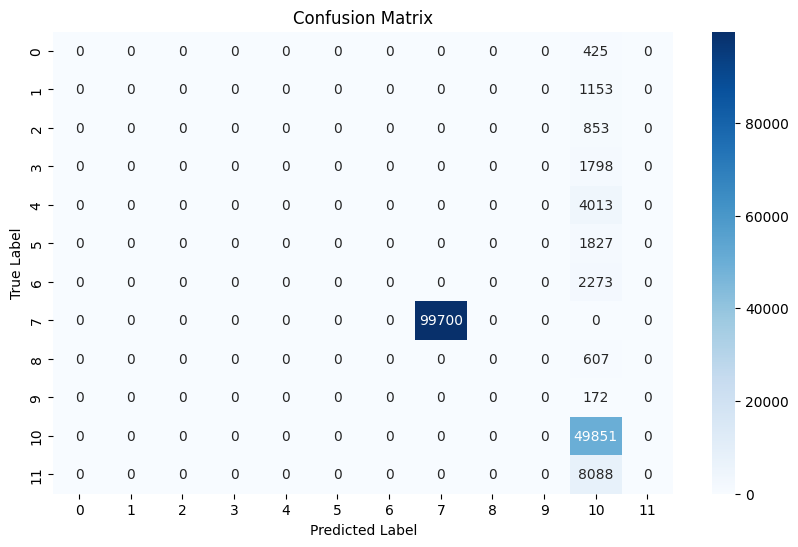

In [62]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
# Make predictions
y_pred = best_model.predict(X_train)

# Compute evaluation metrics
accuracy = accuracy_score(y_train, y_pred)
conf_matrix = confusion_matrix(y_train, y_pred)
precision = precision_score(y_train, y_pred, average='weighted')  # Use 'macro' for class imbalance
recall = recall_score(y_train, y_pred, average='weighted')
f1 = f1_score(y_train, y_pred, average='weighted')

# Print results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Plot Confusion Matrix
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

### Importancia de Features

Procedo a graficar las variables de fechas y determinar cuanto impactan en el conjunto de datos:

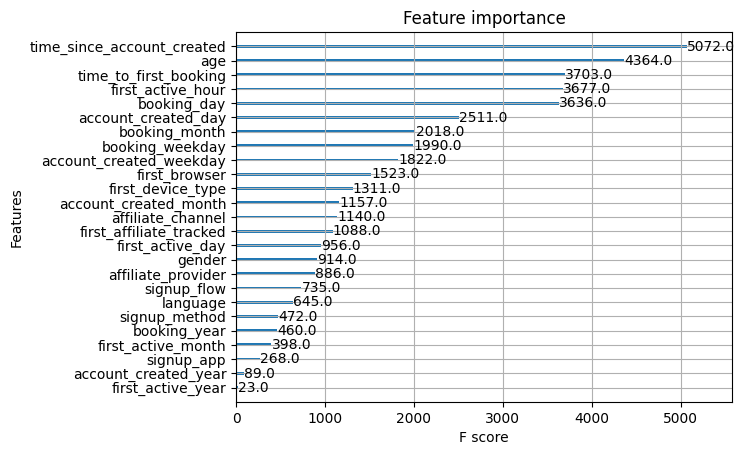

In [52]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

plot_importance(model)
plt.show()

Se puede apreciar en estos datos, aquellos que tienen mas peso son los de 'Edad'.

### Resultados XGBoost
Usando XGBoost con la mayor cantidad de columnas posibles y sin amputar datos, obtengo una 

                                            Accuracy de 87.5%


Empleando GridSearch para ajustar hiperparametros, el tiempo de procesamiento es muchisimo mas alto. 
Y el modelo mejora hasta un... 

                                            Accuracy de 87.579%

Lo cual representa una mejora, sin embargo no considero que el tiempo de procesamiento amerite el incremento en Accuracy.

Finalmente, corroborando el modelo que acabo de realizar, se obtienen las siguientes metricas.

✓ Accuracy: 0.8758
✓ Precision: 0.7887
✓ Recall: 0.8758
✓ F1 Score: 0.8246

Los cuales aseguran que el modelo predictivo es hasta cierto punto confiable:
El modelo aprendió patrones fuertes en los datos y tiene una alta capacidad de predicción asi un buen balance entre precisión y recall. Sin embargo, al tener una precisión más baja que recall, puede estar prediciendo destinos erróneos en algunos casos.

## Conclusiones

1. Comparando el performance de XGBoost sin eliminar tantas filas (train_users_2.csv)
vs el dataset recortado (balanced_df), el dataset con mas informacion tiene muchisima mejor precision que el balanceado. Mientras mas informacion respete, mejor.
2. Lazypredict ayuda a probar multiples metodos de machine learning y evaluar su eficiencia de una manera muy conveniente, tomando en cuenta que el usuario no tiene que escribir tantas lineas de codigo.
3. El balanceo de informacion es importante, pero si quitas muchas columnas, terminaras con un modelo PESIMO.
4. De nuevo, en el mundo de ciencia de datos: a mayor cantidad, mejor. Claro, que la limpieza de los datos es importante, pero si tienes muchisimos datos, tienes mas posibilidades de hallar algo bueno.
5. La afinacion de hiperparametros puede ser muy util para mejorar el rendimiento del modelo, pero a veces es tan pequenya la mejoria, que no vale la pena aumentar el tiempo de procesamiento.


